In [48]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from matplotlib import animation, rc
from IPython import display
import time
import copy


In [3]:
from IPython.core.pylabtools import figsize
def Normal_data(k, sizes, means, covs):
    X = np.ndarray(shape=(0, 2))
    y = np.array([])
    for idx, (size, mean, cov) in enumerate(zip(sizes, means, covs)):
        Z = np.random.multivariate_normal(mean=mean, cov=cov, size=size)
        X = np.concatenate((X, Z), axis=0)
        y = np.concatenate((y, np.ones(shape=(size,)) * idx), axis=0)
    return X, y

def Plot_data(X, dims=[0, 1], fig_size=(8, 8)):
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    ax.set_title("My Data")
    if len(dims) == 2:
        ax.plot(X[:, dims[0]], X[:, dims[1]], 'x')
    elif len(dims) == 3:
        fig.plot(X[:, dims[0]], X[:, dims[1]], 'x')
    else:
        return
    fig.show()

In [131]:
def random_init(X, k):
    idx_c = np.random.choice(X.shape[0], size=k, replace=False)
    return X[idx_c, :]

def random_subset(X, k, m):
    new_C = np.ndarray(shape=(k, X.shape[1]))
    for c in range(k):
        idx_m = np.random.choice(X.shape[0], size=int(m * X.shape[0]), replace=False)
        new_C[c, :] = np.mean(X[idx_m,:], axis=0)
    return new_C

def random_from_circle(X, k, p_c, r, theta):
    R = np.expand_dims(np.random.uniform(low=min(r), high=max(r), size=k), axis=1)
    Theta = np.expand_dims(np.random.uniform(low=min(theta), high=max(theta), size=k), axis=1)
    return np.concatenate((p_c[0] + R*np.cos(Theta), p_c[1] + R*np.sin(Theta)), axis=1)

def Kmean(X, T, Centers):
    y_est = np.ndarray(shape=(T, X.shape[0]))
    for t in range(T):
        X_r = np.repeat(np.expand_dims(X, axis=2), Centers.shape[0], axis=2)
        Centers_r = np.repeat(np.expand_dims(Centers.T, axis=0), X.shape[0], axis=0)
        y_est[t, :] = np.argmin(LA.norm(X_r - Centers_r, ord=2, axis=1), axis=1)

        for c in range(Centers.shape[0]):
            idx = np.where(y_est[t, :] == c)[0]
            new_centers = np.mean(X[idx,:], axis=0)
            Centers[c, :] = new_centers
    return y_est

def rand_index(y_est, y):
    res = 0
    for i in range(len(y)):
        for j in range(i + 1, len(y)):
            res += ((y[i] == y[j]) == ((y_est[i] == y_est[j])))
    return res * 200 / (len(y) * len(y) - 1)

In [183]:
def Animation_Kmean(X, Centers, y_est, y=None, dims=[0, 1]):

    min_X, max_X, min_Y, max_Y = min(X[:, 0]), max(X[:, 0]) , min(X[:, 1]), max(X[:, 1])

    fig = plt.figure(figsize=(20, 8))
    ax = plt.subplot(1,2,1)   

    ax.set_xlim((min_X - 0.1 * abs(min_X) , max_X + 0.1 * abs(max_X)))          
    ax.set_ylim((min_Y - 0.1 * abs(min_Y) , max_Y + 0.1 * abs(max_Y)))

    def drawframe(n):
        ax.clear()
        ax.set_xlim((min_X - 0.1 * abs(min_X) , max_X + 0.1 * abs(max_X)))            
        ax.set_ylim((min_Y - 0.1 * abs(min_Y) , max_Y + 0.1 * abs(max_Y)))
        txt_title = ax.set_title('')
        if n == 0:
            line, = ax.plot([], [], 'o', ms=5)
            line.set_data(X[:, dims[0]], X[:, dims[1]])
            point, = ax.plot([], [], 'ko', ms=10)
            point.set_data(Centers[:, dims[0]], Centers[:, dims[1]])
            txt_title.set_text(f'Iteration : {0}')
            return line, point
        data = []
        P = np.ndarray(shape=Centers.shape)
        for c in range(Centers.shape[0]):
            idx = np.where(y_est[n, :] == c)[0]
            P[c, :] = np.mean(X[idx,:], axis=0)
            line, = ax.plot([], [], 'o', ms=5)
            line.set_data(X[idx, dims[0]], X[idx, dims[1]])
            data.append(line)
        points, = ax.plot([], [], 'ko', ms=10)
        points.set_data(P[:, dims[0]], P[:, dims[1]])
        if isinstance(y,np.ndarray):
            txt_title.set_text(f'Iteration : {n}  , Rand index : {rand_index(y_est[n, :], y):2.2f} %')
        else:
            txt_title.set_text(f'Iteration : {n}')
        return data

    anim = animation.FuncAnimation(fig, drawframe, frames=y_est.shape[0], interval=300, blit=True)

    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

k = 3
sizes = [100, 50, 100]
means = [[0,0], [4, 4], [-2, -2]]
covs = [[[1, 0],[0, 4]], [[3, 0],[0, 2]], [[1, 0],[0, 1]]]

X, y = Normal_data(k=k, sizes=sizes, means=means, covs=covs)
First_Centers = random_subset(X, k, m=0.8)

y_est = Kmean(X, T=12, Centers=First_Centers)
Animation_Kmean(X=X, Centers=First_Centers, y_est=y_est, y=y)

AttributeError: ignored

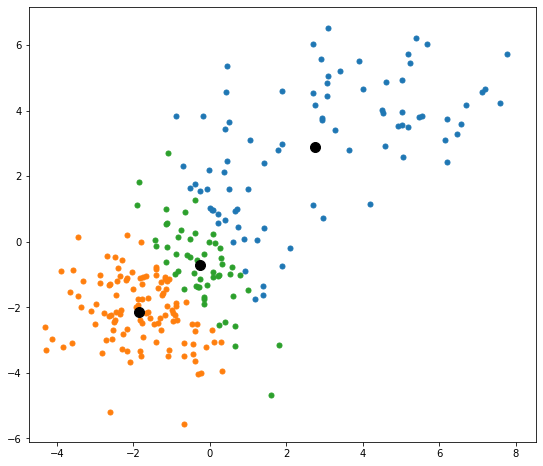

In [176]:
k = 3
sizes = [100, 50, 100]
means = [[0,0], [4, 4], [-2, -2]]
covs = [[[1, 0],[0, 4]], [[3, 0],[0, 2]], [[1, 0],[0, 1]]]

X, y = Normal_data(k=k, sizes=sizes, means=means, covs=covs)
First_Centers = random_subset(X, k, m=1)

y_est = Kmean(X, T=12, Centers=First_Centers)
Animation_Kmean(X=X, Centers=First_Centers, y_est=y_est, y=False)

In [119]:
"""
def loss(theta):
    return 100 * rand_index(Kmean(X, T=8, Centers=theta)[-1], y)


def GradientAscent(epochs, lr):
    eps = 10 ** (-1)
    theta = random_init(X, k=3)
    for _ in range(epochs):
        print(f'theta : \n{theta}\n')
        print(f'lr : \n{lr}\n')
        print(f'grad : \n{grad(func=loss, x=theta, eps=eps)}\n')
        theta = theta + lr * grad(func=loss, x=theta, eps=eps)
        print(f'rand index : \n{rand_index(Kmean(X, T=8, Centers=theta)[-1], y)}\n')
    return 0

def grad(func, x, eps):
    gradient = np.zeros_like(x)
    curr_val = func(x)
    for row in range(x.shape[0]):
            for col in range(x.shape[1]):
                x_eps = copy.deepcopy(x)
                x_eps[row, col] += eps
                gradient[row , col] = (func(x_eps) - curr_val) / eps
    return gradient


GradientAscent(epochs=3, lr=0.1)
"""

theta : 
[[-0.42377585 -0.12889702]
 [-2.72489723 -2.49926655]
 [-0.59484018 -1.68636029]]

lr : 
0.1

grad : 
[[-81.95331125 -81.95331125]
 [-81.95331125 -81.95331125]
 [-81.95331125 -81.95331125]]

rand index : 
0.7522680362885806

theta : 
[[ 4.25530485  4.01419033]
 [-1.34511315 -2.14425717]
 [ 0.00469355  0.92266703]]

lr : 
0.1

grad : 
[[ 0.          0.        ]
 [-6.27210035 -6.27210035]
 [-3.16805069 -6.27210035]]

rand index : 
0.7522680362885806

theta : 
[[ 4.25530485  4.01419033]
 [-1.34511315 -2.14425717]
 [ 0.00469355  0.92266703]]

lr : 
0.1

grad : 
[[ 0.          0.        ]
 [-6.27210035 -6.27210035]
 [-3.16805069 -6.27210035]]

rand index : 
0.7522680362885806



0